In [1]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Classifiers from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr
flight_data = pd.read_csv("D:\Python(New)\Project\Mid_Term_Project\Colin\clean\\flights_with_features_test.csv")

In [2]:
# extract year from flight date
flight_data['year'] = pd.DatetimeIndex(flight_data['fl_date']).year
flight_data['month'] = pd.DatetimeIndex(flight_data['fl_date']).month
flight_data['day_of_month'] = pd.DatetimeIndex(flight_data['fl_date']).day
# fill na values in arrive delay
flight_data['arr_delay'] = flight_data['arr_delay'].fillna(flight_data['arr_delay'].median())

In [3]:
# convert data time as string
flight_data['crs_dep_time'] = flight_data['crs_dep_time'].astype('str')
flight_data['crs_arr_time'] = flight_data['crs_arr_time'].astype('str')
# add leading zero to the front of missing digit
flight_data['crs_dep_time'] = flight_data['crs_dep_time'].apply(lambda x: '{0:0>4}'.format(x))
flight_data['crs_arr_time'] = flight_data['crs_arr_time'].apply(lambda x: '{0:0>4}'.format(x))

In [4]:
flight_data.drop(columns = ['fl_date',
                            'mkt_unique_carrier',
                            'origin_city',
                            'origin_state',
                            'dest_city',
                            'dest_state',
                           'dep_delay'],
                 axis = 1,
                 inplace=True
                )

In [5]:
flight_data

,day_of_the_week,month,origin,dest,crs_dep_time,taxi_out,taxi_in,crs_arr_time,air_time,arr_delay,...,dest_windchillc,dest_precipinches,dest_humidity,dest_visibilitymiles,dest_pressureinches,dest_dewpointc,dest_cloudcover,dest_uvindex,year,day_of_month
0,Thursday,2,STL,ORD,1145,10,11,1305,58,-2.0,...,-16,0.0,42,6,30,-18,0,2,2018,1
1,Monday,10,DFW,GRI,2120,19,4,2303,77,-8.0,...,14,0.0,65,6,30,8,8,1,2018,1
2,Friday,6,LIT,DFW,0852,10,9,1025,49,-34.0,...,23,0.0,92,6,30,22,70,5,2018,1
3,Monday,1,DCA,MEM,1621,12,3,1749,122,143.0,...,-14,0.0,34,6,31,-20,0,2,2018,1
4,Tuesday,5,SYR,ORD,1811,8,12,1924,94,-22.0,...,21,0.0,51,6,30,10,8,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Friday,2,ABQ,DAL,1605,11,4,1845,82,37.0,...,12,0.0,74,5,30,7,75,1,2019,1
1025,Friday,11,ATL,BWI,0830,13,2,1020,79,-14.0,...,1,0.0,62,6,30,-1,0,3,2019,1
1026,Sunday,12,ABQ,BWI,1200,12,4,1735,177,1.0,...,3,0.2,96,4,30,6,100,2,2019,1
1027,Tuesday,1,ABQ,BWI,0930,15,4,1500,173,-20.0,...,10,0.0,62,6,30,5,8,4,2019,1


A **correlation coefficient** measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.
A **point-biserial correlation** is used to measure the strength and direction of the association that exists between **one continuous variable and one dichotomous variable.**

In [6]:
# encode categorical data into numeric values
labelEncoder = LabelEncoder()
flight_data["day_of_the_week"] = labelEncoder.fit_transform(flight_data["day_of_the_week"])
flight_data['origin'] = labelEncoder.fit_transform(flight_data['origin'])
flight_data['dest'] = labelEncoder.fit_transform(flight_data['dest'])
flight_data['origin_weather_condn'] = labelEncoder.fit_transform(flight_data['origin_weather_condn'])
flight_data['origin_winddir16point'] = labelEncoder.fit_transform(flight_data['origin_winddir16point'])
flight_data['dest_weather_condn'] = labelEncoder.fit_transform(flight_data['dest_weather_condn'])
flight_data['dest_winddir16point'] = labelEncoder.fit_transform(flight_data['dest_winddir16point'])
flight_data['crs_dep_time'] = labelEncoder.fit_transform(flight_data['crs_dep_time'])
flight_data['crs_arr_time'] = labelEncoder.fit_transform(flight_data['crs_arr_time'])
flight_data = pd.get_dummies(flight_data, columns = ['month','year'])
# categorical and numeric data
categorical = ['year','month','day_of_week','day_of_month','origin','dest','origin_weather_cond','origin_winddir16point','dest_weather_condn','dest_winddir16point','crs_dep_time']
numerical = ['taxi_out','taxi_in','air_time','distance','origin_tempc','origin_windspeedmiles','origin_windgustmiles','origin_windchillc','origin_precipinches','origin_humidity','origin_visibilitymiles','origin_pressureinches','origin_dewpointc','origin_cloudcover','origin_uvindex','dest_tempc','dest_windspeedmiles','dest_windgustmiles','dest_windchillc','dest_precipinches','dest_humidity','dest_visibilitymiles','dest_pressureinches','dest_dewpointc','dest_cloudcover','dest_uvindex']
target = flight_data['arr_delay']

# check p-values and corrcoeff
pbc = list()
for col in numerical:
    ans = pointbiserialr(flight_data[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,taxi_out,0.175118,1.564207e-08
1,origin_pressureinches,0.088999,4.275247e-03
2,taxi_in,0.084874,6.445571e-03
3,dest_pressureinches,0.057757,6.402320e-02
4,dest_humidity,0.041371,1.848241e-01
5,dest_precipinches,0.039947,2.004176e-01
6,origin_humidity,0.031896,3.066955e-01
7,dest_windgustmiles,0.007890,8.004263e-01
8,dest_windspeedmiles,0.004943,8.741547e-01
9,origin_windspeedmiles,0.003143,9.197768e-01


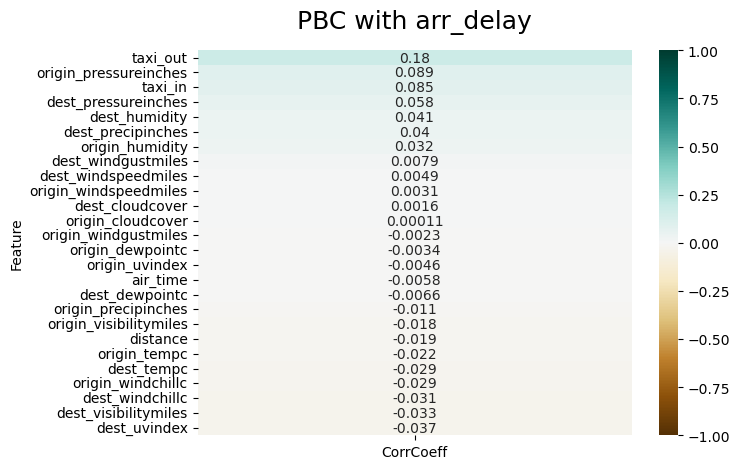

In [7]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with arr_delay", fontdict={"fontsize":18}, pad=16);
del pbc_corr

### Feature Selection

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
flight_scaled = scaler.fit_transform(flight_data)

In [9]:
flight_data_scaled =  pd.DataFrame(flight_scaled, columns=flight_data.columns)

In [10]:
X = flight_data_scaled.loc[:, flight_data_scaled.columns != "arr_delay"]
y = np.array(flight_data_scaled.loc[:, flight_data_scaled.columns == "arr_delay"]["arr_delay"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

In [11]:
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestClassifier
   
    Parameters
    ----------
    X_train: numpy.ndarray        
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set    
    X_test: numpy.ndarray        
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set    
    num_trees: int
        The value for `n_estimators` argument of RandomForestRegressor
    Returns
    -------
        None
        Shows the number of trees vs error rate plot
            
    """    
    train_err = []
    test_err = []
    for ntree in num_trees:
        model = RandomForestRegressor(n_estimators=ntree)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    fig, ax = plt.subplots()
    ax.plot(num_trees,train_err,label="train")
    ax.plot(num_trees,test_err,label="test")
    ax.set_xlabel('number of trees');
    ax.set_ylabel('error rate');
    ax.set_xscale('log')
    ax.legend()
    plt.savefig('D:\Python(New)\Project\Mid_Term_Project\Colin\pictures\\error_rate.png')  
    plt.show()

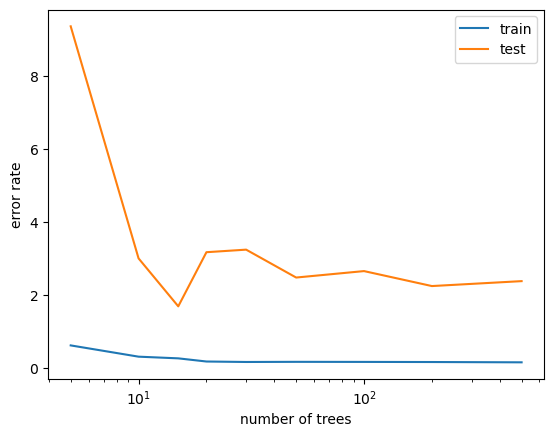

In [71]:
make_num_tree_plot(X_train, y_train, X_val, y_val, (5,10,15,20,30,50,100,200,500))

In [13]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.116
Model:                            OLS   Adj. R-squared (uncentered):              0.061
Method:                 Least Squares   F-statistic:                              2.110
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                    2.79e-05
Time:                        11:00:54   Log-Likelihood:                         -1186.7
No. Observations:                 823   AIC:                                      2469.
Df Residuals:                     775   BIC:                                      2696.
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
day_of_the_week           -0.0755      0.054     -1.408      0.160      -0.181       0.030
origin                    -0.0262      0.038     -0.687      0.493      -0.101       0.049
dest                      -0.0255      0.038     -0.666      0.506      -0.101       0.050
crs_dep_time               0.0773      0.065      1.180      0.238      -0.051       0.206
taxi_out                   0.1741      0.039      4.484      0.000       0.098       0.250
taxi_in                    0.0786      0.036      2.161      0.031       0.007       0.150
crs_arr_time              -0.0703      0.061     -1.144      0.253      -0.191       0.050
air_time                   0.2899      0.232      1.251      0.211      -0.165       0.745
distance                  -0.3391      0.232     -1.462      0.144      -0.795       0.116
origin_weather_condn       0.0768      0.049      1.553      0.121      -0.020       0.174
origin_tempc               0.3240      0.542      0.598      0.550      -0.740       1.388
origin_windspeedmiles      0.0244      0.104      0.234      0.815      -0.180       0.229
origin_winddir16point      0.0552      0.041      1.356      0.176      -0.025       0.135
origin_windgustmiles      -0.0068      0.104     -0.066      0.948      -0.211       0.198
origin_windchillc         -0.1352      0.517     -0.261      0.794      -1.151       0.881
origin_precipinches       -0.0536      0.047     -1.132      0.258      -0.146       0.039
origin_humidity            0.2010      0.136      1.481      0.139      -0.065       0.467
origin_visibilitymiles     0.0005      0.047      0.010      0.992      -0.091       0.092
origin_pressureinches      0.0612      0.047      1.316      0.189      -0.030       0.152
origin_dewpointc          -0.1967      0.210     -0.937      0.349      -0.609       0.215
origin_cloudcover          0.0005      0.052      0.009      0.992      -0.102       0.103
origin_uvindex             0.0297      0.070      0.422      0.673      -0.109       0.168
dest_weather_condn         0.0424      0.052      0.823      0.411      -0.059       0.144
dest_tempc                 0.0256      0.588      0.043      0.965      -1.129       1.180
dest_windspeedmiles        0.0132      0.108      0.122      0.903      -0.199       0.225
dest_winddir16point       -0.0056      0.040     -0.140      0.889      -0.085       0.073
dest_windgustmiles         0.0086      0.107      0.081      0.936      -0.202       0.219
dest_windchillc            0.0461      0.573      0.080      0.936      -1.079       1.171
dest_precipinches          0.0038      0.039      0.097      0.923      -0.074       0.081
dest_humidity              0.0421      0.127      0.331      0.741      

In [67]:
random_forest = RandomForestRegressor(n_estimators= 10)

In [55]:
from rfpimp import *
import warnings
warnings.filterwarnings('ignore')

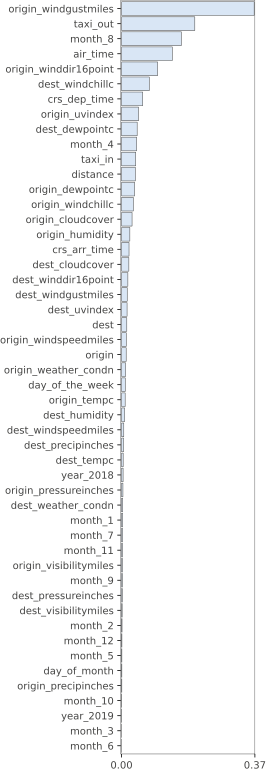

In [68]:
random_forest.fit(X_train, y_train)
I = importances(random_forest, X_train, y_train)
plt.savefig('D:\Python(New)\Project\Mid_Term_Project\Colin\pictures\\important_predict.png')  
plot_importances(I)

In [69]:
random_forest.predict(X_val)

array([ 0.03540552, -0.11772248, -0.0550792 ,  0.24073625, -0.30565229,
       -0.23778875,  0.45824761, -0.31087257,  0.05628661, -0.36481538,
        0.48434898, -0.19080629,  0.25987725,  0.44954716, -0.25344957,
        0.12763034, -0.26389011, -0.33871402,  0.07020734, -0.03071793,
        0.3834237 , -0.26911039, -0.06377966, -0.25344957,  0.70360043,
       -0.41005775, -0.2273482 , -0.20298693, -0.24822929,  0.2494367 ,
       -0.27955093,  0.40430479,  0.52785125, -0.27085048,  1.03595779,
        0.04410598, -0.33871402,  0.26509752, -0.11772248,  0.11370961,
        0.71578107,  2.42629043, -0.03245802, -0.03071793,  0.08760825,
       -0.0933612 , -0.24300902,  0.95417352,  0.20245425, -0.17688557,
       -0.1890662 ,  0.69838016,  4.46219678, -0.37351584, -0.23256848,
        0.08064789,  0.71056079,  0.09978889, -0.15948466, -0.06029948,
       -0.17514548,  0.09108843, -0.17166529,  0.10500916, -0.29173157,
        0.59919498, -0.16644502, -0.27433066,  0.41126516,  0.21

In [70]:
y_val

array([-0.51794338, -0.43093884, -0.39613702, -0.10032157, -0.84856066,
       -0.41353793, -0.04811884, -0.32653338,  0.64791752, -0.15252429,
       -0.23952884, -0.23952884, -0.03071793,  0.24769661, -0.29173157,
        0.31730025,  0.14329116, -0.37873611, -0.72675429, -0.57014611,
       -0.34393429, -0.23952884,  0.83932752, -0.29173157, -0.65715066,
        1.20474661, -0.34393429, -0.44833975, -0.27433066, -0.27433066,
        0.0214848 , -0.13512339, -0.29173157, -0.04811884, -0.30913248,
        0.28249843, -0.18732611,  0.0388857 ,  0.4217057 , -0.39613702,
       -0.13512339,  0.83932752, -0.3613352 ,  0.35210207,  0.26509752,
       -0.43093884, -0.37873611, -0.22212793, -0.22212793, -0.23952884,
        0.31730025,  0.14329116, -0.3613352 , -0.41353793, -0.3613352 ,
       -0.3613352 , -0.13512339, -0.44833975,  0.16069207, -0.11772248,
        0.47390843,  0.10848934,  0.57831389, -0.06551975, -0.10032157,
        0.16069207, -0.23952884, -0.57014611, -0.51794338, -0.11